In [2]:
import re
import matplotlib.pyplot as plt

In [7]:

def parse_metrics(file_name):
# Initialize lists to store the extracted data
    losses_distributed = []
    accuracy_distributed = []
    losses_centralized = []
    accuracy_centralized = []

    # Regular expressions to match the lines with loss and accuracy values
    loss_distributed_pattern = re.compile(r"losses_distributed (.+)")
    accuracy_distributed_pattern = re.compile(r"metrics_distributed {'accuracy': (.+)}")
    loss_centralized_pattern = re.compile(r"losses_centralized (.+)")
    accuracy_centralized_pattern = re.compile(r"metrics_centralized {'accuracy': (.+)}")

    # Read the log file and extract data
    with open(file_name, "r") as file:
        for line in file:
            if match := loss_distributed_pattern.search(line):
                losses_distributed = eval(match.group(1))
            elif match := accuracy_distributed_pattern.search(line):
                accuracy_distributed = eval(match.group(1))
            elif match := loss_centralized_pattern.search(line):
                losses_centralized = eval(match.group(1))
            elif match := accuracy_centralized_pattern.search(line):
                accuracy_centralized = eval(match.group(1))
    return losses_distributed ,accuracy_distributed ,losses_centralized ,accuracy_centralized ,


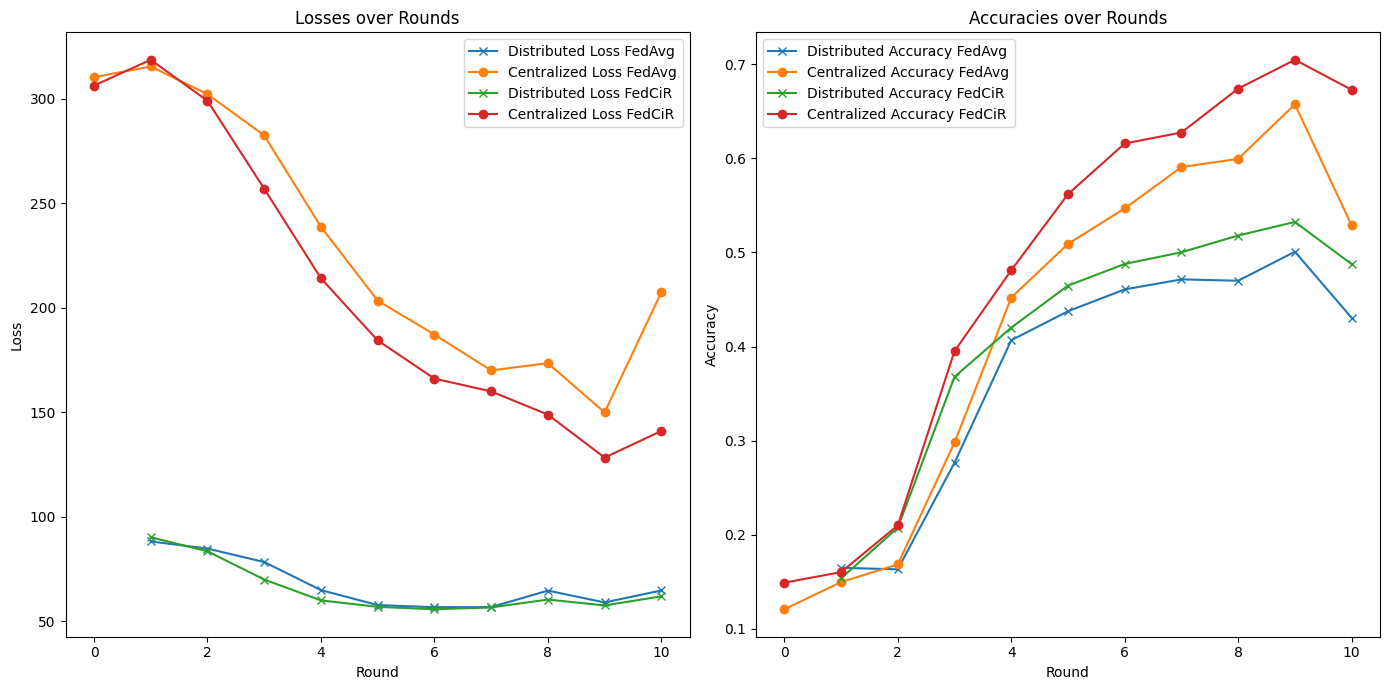

In [9]:
losses_distributed_avg, accuracy_distributed_avg, losses_centralized_avg, accuracy_centralized_avg=parse_metrics('logs_fed_avg.log')
losses_distributed_cir, accuracy_distributed_cir, losses_centralized_cir, accuracy_centralized_cir=parse_metrics('logs_fed_cir.log')

# Parse the data for plotting
rounds_distributed_avg, distributed_loss_avg = zip(*losses_distributed_avg)
rounds_distributed_avg, distributed_accuracy_avg = zip(*accuracy_distributed_avg)
rounds_centralized_avg, centralized_loss_avg = zip(*losses_centralized_avg)
rounds_centralized_avg, centralized_accuracy_avg = zip(*accuracy_centralized_avg)

rounds_distributed_cir, distributed_loss_cir = zip(*losses_distributed_cir)
rounds_distributed_cir, distributed_accuracy_cir = zip(*accuracy_distributed_cir)
rounds_centralized_cir, centralized_loss_cir = zip(*losses_centralized_cir)
rounds_centralized_cir, centralized_accuracy_cir = zip(*accuracy_centralized_cir)
# Plot the losses
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(rounds_distributed_avg, distributed_loss_avg, label="Distributed Loss FedAvg", marker="x")
plt.plot(rounds_centralized_avg, centralized_loss_avg, label="Centralized Loss FedAvg", marker="o")
plt.plot(rounds_distributed_cir, distributed_loss_cir, label="Distributed Loss FedCiR", marker="x")
plt.plot(rounds_centralized_cir, centralized_loss_cir, label="Centralized Loss FedCiR", marker="o")
plt.title("Losses over Rounds")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.legend()

# Plot the accuracies
plt.subplot(1, 2, 2)
plt.plot(
    rounds_distributed_avg, distributed_accuracy_avg, label="Distributed Accuracy FedAvg", marker="x"
)
plt.plot(
    rounds_centralized_avg, centralized_accuracy_avg, label="Centralized Accuracy FedAvg", marker="o"
)
plt.plot(
    rounds_distributed_cir, distributed_accuracy_cir, label="Distributed Accuracy FedCiR", marker="x"
)
plt.plot(
    rounds_centralized_cir, centralized_accuracy_cir, label="Centralized Accuracy FedCiR", marker="o"
)
plt.title("Accuracies over Rounds")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()